In [227]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import math

In [3]:
# Problem 1
def condnum_mat(A):
    minimum = min(la.svdvals(A))
    if minimum == 0:
        return np.inf
    maximum = max(la.svdvals(A))
    return maximum / minimum

A = [[1, 3], [11, 17]]
B = la.qr(A)[0]
print(condnum_mat(B))
print(np.linalg.cond(B))

C = [[0, 1], [0, 0]]
print(condnum_mat(C))
print(np.linalg.cond(C))

1.0000000000000002
1.0000000000000002
inf
inf


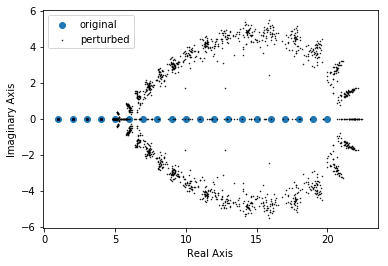

absolute condition number 4.814718377788933
relative condition number 4.70083048882040e+19


In [78]:
# Problem 2
def perturb():
    abs_k = []
    rel_k = []
    w_roots = np.arange(1, 21)
    plt.scatter(w_roots, np.zeros(len(w_roots)), label='original')
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    mu, sigma = 1, 1e-10

    for j in range(100):
        rand = np.random.normal(mu, sigma, len(w_coeffs))
        new_coeffs = w_coeffs * rand
        new_roots = np.sort(np.roots(np.poly1d(new_coeffs)))    
        abs_k.append(la.norm(new_roots - w_roots, np.inf) / la.norm(rand, np.inf))
        rel_k.append(k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf))
        plt.scatter(np.real(new_roots), np.imag(new_roots), marker='.', s=1, color='k')
    plt.scatter(np.real(new_roots), np.imag(new_roots), marker='.', s=1, color='k', label='perturbed')
    plt.legend()
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.show()
    return np.mean(abs_k), np.mean(rel_k)
abs_k, rel_k = perturb()
print('absolute condition number', abs_k)
print('relative condition number', rel_k)

In [146]:
# Problem 3
def condition(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    lbd = la.eigvals(A) 
    lbd_hat = la.eigvals(A + H)
    abs_k = la.norm(lbd - lbd_hat, ord=2) / la.norm(H, ord=2)
    rel_k = abs_k * la.norm(A, ord=2) / la.norm(lbd, ord=2)
    return abs_k, rel_k

A = np.array([[1,8,4],[6,3,4],[9,5,3]])
abs_k, rel_k = condition(A)
print('absolute condition number', abs_k)
print('relative condition number', rel_k)

absolute condition number 1.595697359034368
relative condition number 1.5581997231029514


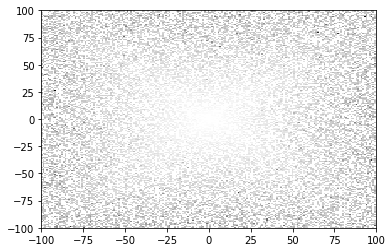

In [186]:
# Problem 4
def condition2(xmin, xmax, ymin, ymax, res):
    xvalues = np.linspace(xmin, xmax, res)
    yvalues = np.linspace(ymin, ymax, res)
    xx, yy = np.meshgrid(xvalues, yvalues)
    c = np.vectorize(lambda x, y: (condition(np.array([[1, x], [y, 1]])))[1])(xx, yy)
    plt.pcolormesh(xx, yy, c, cmap='gray_r')
    plt.show()
    
xmin, xmax, ymin, ymax, res = -100, 100, -100, 100, 200
condition2(xmin, xmax, ymin, ymax, res)

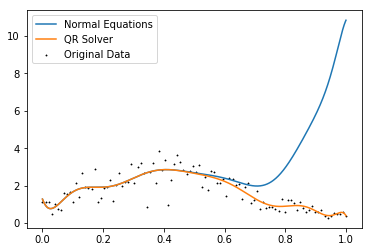

Normal equations error: 28.60846139496782
QR solver error: 4.594287448512287


In [221]:
# Problem 5
def solver1(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    c1 = la.inv(A.T @ A) @ A.T @ yk

    Q, R = la.qr(A.T @ A, mode='economic')
    c2 = la.solve_triangular(R, la.inv(Q) @ A.T @ yk)

    xvals = np.linspace(0, 1, 1000)
    yvals1 = np.polyval(c1, xvals)    
    yvals2 = np.polyval(c2, xvals)

    plt.scatter(xk, yk, label='Original Data', marker='*', s=1, color='k')
    plt.plot(xvals, yvals1, label='Normal Equations')
    plt.plot(xvals, yvals2, label='QR Solver')
    plt.legend()
    plt.show()
    
    err1 = la.norm(A @ c1 - yk, 2)
    err2 = la.norm(A @ c2 - yk, 2)
    return err1, err2

err1, err2 = solver1(14)
print('Normal equations error:', err1)
print('QR solver error:', err2)

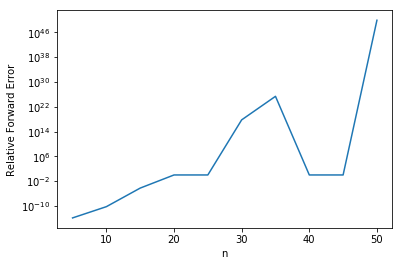

In [234]:
# Problem 6
x = sy.Symbol('x')
err = []
xvals = (np.arange(10) + 1) * 5
for i in xvals:
    n = int(i)
    intgr_real =  float(sy.integrate(((x ** n) * sy.exp(x - 1)), (x, 0, 1)))
    intgr_appr = float(((-1) ** n) * sy.subfactorial(n) + ((-1) ** (n+1)) * (sy.factorial(n) / math.e))
    err.append(abs((intgr_appr - intgr_real) / intgr_real))

plt.plot(xvals, err)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Relative Forward Error')
plt.show()

Looks like the method is not stable for large values of n because the error increases exponentially.